# New section

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [9]:
file = pd.read_csv("data.csv")

In [10]:
file.head()

,Issue key,Issue id,Status,Created,Updated,Custom field (Implementation Planned End Date),Custom field (Implementation Planned Start Date),Assignee,Custom field (Closed Date),Creator,Custom field (Defect Type),Custom field (Environment),Custom field (Test Type),Custom field (Feature Link),Custom field (How I Fixed (Resolution Provided)),Custom field (How It Happened? (Root Cause)),Summary,Labels,Labels.1
0,INSBFOS-1647,406256,New,04/Oct/23 11:15 AM,04/Oct/23 11:21 AM,NaN,NaN,C006846,NaN,C006808,Program Error,NaN,NaN,INSBFOS-861,To be filled-up by developer upon fixes,To be filled-up by developer upon fixes,[QUEST-7321][INSBFOS-1647]#Defect 8: Unable to...,NaN,NaN
1,INSBFOS-1646,406046,New,03/Oct/23 6:21 PM,03/Oct/23 6:24 PM,NaN,NaN,C006846,NaN,C006808,Program Error,NaN,NaN,INSBFOS-861,To be filled-up by developer upon fixes,To be filled-up by developer upon fixes,[QUEST-7321][INSBFOS-1646]#Defect 7: Different...,NaN,NaN
2,INSBFOS-1645,406045,New,03/Oct/23 6:14 PM,03/Oct/23 6:20 PM,NaN,NaN,C006846,NaN,C006808,Program Error,NaN,NaN,INSBFOS-861,To be filled-up by developer upon fixes,To be filled-up by developer upon fixes,[QUEST-7321][INSBFOS-1645]#Defect 6: OBN03 PCW...,NaN,NaN
3,INSBFOS-1644,405106,Assigned,02/Oct/23 5:02 PM,04/Oct/23 2:52 PM,NaN,NaN,C003602,NaN,C003602,Program Error,UAT,UAT,INSBFOS-1627,To be filled-up by developer upon fixes,To be filled-up by developer upon fixes,[QUEST-14635/INSBFOS-1644] #Defect 4: C permit...,NaN,NaN
4,INSBFOS-1643,404935,Closed,02/Oct/23 12:31 PM,03/Oct/23 8:28 AM,NaN,NaN,C006808,03/Oct/23 8:28 AM,C006808,Parameter/Setup Error,NaN,NaN,INSBFOS-861,"Advised to select ""Exclusion Rate Type"" as oth...","""Exclusion Rate Type"" chosen as ""non-tariff ra...",QUEST-7321][INSBFOS-1643]#Defect 5: PCW codes ...,NaN,NaN


In [11]:
stats = ['Assigned', 'Closed', 'New', 'READY FOR TEST', 'Rejected', 'Review In Progress']
filter = file[file['Status'].isin(stats)]
count = filter['Status'].value_counts()

for status, count in count.items():
    print(f"Number of '{status}' occurrences: {count}")

Number of 'Closed' occurrences: 226
Number of 'New' occurrences: 21
Number of 'Rejected' occurrences: 7
Number of 'READY FOR TEST' occurrences: 6
Number of 'Assigned' occurrences: 3


Check missing value

In [12]:
for column in file.columns:
    missing_count = file[column].isnull().sum()
    print(f"Column '{column}' has {missing_count} missing value(s)")

Column 'Issue key' has 0 missing value(s)
Column 'Issue id' has 0 missing value(s)
Column 'Status' has 0 missing value(s)
Column 'Created' has 0 missing value(s)
Column 'Updated' has 0 missing value(s)
Column 'Custom field (Implementation Planned End Date)' has 273 missing value(s)
Column 'Custom field (Implementation Planned Start Date)' has 273 missing value(s)
Column 'Assignee' has 0 missing value(s)
Column 'Custom field (Closed Date)' has 46 missing value(s)
Column 'Creator' has 0 missing value(s)
Column 'Custom field (Defect Type)' has 9 missing value(s)
Column 'Custom field (Environment)' has 40 missing value(s)
Column 'Custom field (Test Type)' has 72 missing value(s)
Column 'Custom field (Feature Link)' has 42 missing value(s)
Column 'Custom field (How I Fixed (Resolution Provided))' has 25 missing value(s)
Column 'Custom field (How It Happened? (Root Cause))' has 29 missing value(s)
Column 'Summary' has 0 missing value(s)
Column 'Labels' has 242 missing value(s)
Column 'Labels

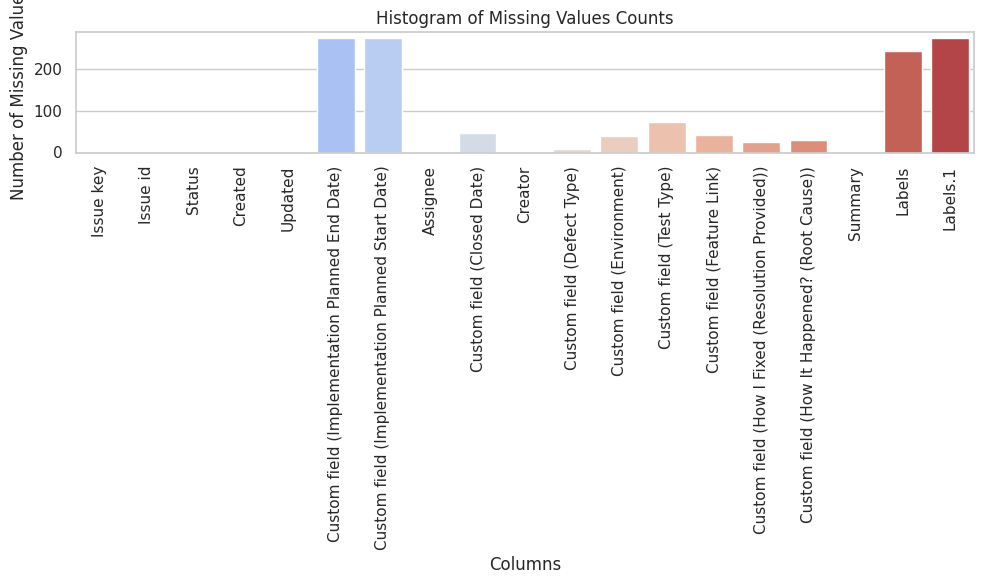

In [16]:
missing_counts = file.isnull().sum()

sns.set(style='whitegrid')

# Create a barplot of missing values counts
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=missing_counts.index, y=missing_counts.values, palette='coolwarm')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.title('Histogram of Missing Values Counts')
plt.tight_layout()

plt.show()

Drop missing column where data is all NA

In [17]:
df = file.drop('Custom field (Environment)', axis=1)
df.head(5)

,Issue key,Issue id,Status,Created,Updated,Custom field (Implementation Planned End Date),Custom field (Implementation Planned Start Date),Assignee,Custom field (Closed Date),Creator,Custom field (Defect Type),Custom field (Test Type),Custom field (Feature Link),Custom field (How I Fixed (Resolution Provided)),Custom field (How It Happened? (Root Cause)),Summary,Labels,Labels.1
0,INSBFOS-1647,406256,New,04/Oct/23 11:15 AM,04/Oct/23 11:21 AM,NaN,NaN,C006846,NaN,C006808,Program Error,NaN,INSBFOS-861,To be filled-up by developer upon fixes,To be filled-up by developer upon fixes,[QUEST-7321][INSBFOS-1647]#Defect 8: Unable to...,NaN,NaN
1,INSBFOS-1646,406046,New,03/Oct/23 6:21 PM,03/Oct/23 6:24 PM,NaN,NaN,C006846,NaN,C006808,Program Error,NaN,INSBFOS-861,To be filled-up by developer upon fixes,To be filled-up by developer upon fixes,[QUEST-7321][INSBFOS-1646]#Defect 7: Different...,NaN,NaN
2,INSBFOS-1645,406045,New,03/Oct/23 6:14 PM,03/Oct/23 6:20 PM,NaN,NaN,C006846,NaN,C006808,Program Error,NaN,INSBFOS-861,To be filled-up by developer upon fixes,To be filled-up by developer upon fixes,[QUEST-7321][INSBFOS-1645]#Defect 6: OBN03 PCW...,NaN,NaN
3,INSBFOS-1644,405106,Assigned,02/Oct/23 5:02 PM,04/Oct/23 2:52 PM,NaN,NaN,C003602,NaN,C003602,Program Error,UAT,INSBFOS-1627,To be filled-up by developer upon fixes,To be filled-up by developer upon fixes,[QUEST-14635/INSBFOS-1644] #Defect 4: C permit...,NaN,NaN
4,INSBFOS-1643,404935,Closed,02/Oct/23 12:31 PM,03/Oct/23 8:28 AM,NaN,NaN,C006808,03/Oct/23 8:28 AM,C006808,Parameter/Setup Error,NaN,INSBFOS-861,"Advised to select ""Exclusion Rate Type"" as oth...","""Exclusion Rate Type"" chosen as ""non-tariff ra...",QUEST-7321][INSBFOS-1643]#Defect 5: PCW codes ...,NaN,NaN


In [18]:
# fill in the NA values with TBD in all column
for col in df.columns:
  df[col].fillna("TBD", inplace = True)

# check if its any missing value
print(df.isnull().sum())

# df.to_csv("new.csv")


Issue key                                           0
Issue id                                            0
Status                                              0
Created                                             0
Updated                                             0
Custom field (Implementation Planned End Date)      0
Custom field (Implementation Planned Start Date)    0
Assignee                                            0
Custom field (Closed Date)                          0
Creator                                             0
Custom field (Defect Type)                          0
Custom field (Test Type)                            0
Custom field (Feature Link)                         0
Custom field (How I Fixed (Resolution Provided))    0
Custom field (How It Happened? (Root Cause))        0
Summary                                             0
Labels                                              0
Labels.1                                            0
dtype: int64


Rename column name and drop unrelated column

In [19]:
# drop Created, Updated, Assignee, Closed Date,
# Custom field (How It Happened? ( Root Cause)), Custom field (How I Fixed (Resolution Provided))
# Feel free to drop unnecessary columns
dropCol = [
    'Created', 'Updated', 'Assignee', 'Custom field (Closed Date)', 'Custom field (Implementation Planned End Date)', 'Custom field (Implementation Planned Start Date)',
    'Custom field (How It Happened? (Root Cause))', 'Custom field (How I Fixed (Resolution Provided))'
]

df.drop(dropCol, axis=1, inplace=True)

df.head(5)

,Issue key,Issue id,Status,Creator,Custom field (Defect Type),Custom field (Test Type),Custom field (Feature Link),Summary,Labels,Labels.1
0,INSBFOS-1647,406256,New,C006808,Program Error,TBD,INSBFOS-861,[QUEST-7321][INSBFOS-1647]#Defect 8: Unable to...,TBD,TBD
1,INSBFOS-1646,406046,New,C006808,Program Error,TBD,INSBFOS-861,[QUEST-7321][INSBFOS-1646]#Defect 7: Different...,TBD,TBD
2,INSBFOS-1645,406045,New,C006808,Program Error,TBD,INSBFOS-861,[QUEST-7321][INSBFOS-1645]#Defect 6: OBN03 PCW...,TBD,TBD
3,INSBFOS-1644,405106,Assigned,C003602,Program Error,UAT,INSBFOS-1627,[QUEST-14635/INSBFOS-1644] #Defect 4: C permit...,TBD,TBD
4,INSBFOS-1643,404935,Closed,C006808,Parameter/Setup Error,TBD,INSBFOS-861,QUEST-7321][INSBFOS-1643]#Defect 5: PCW codes ...,TBD,TBD


In [20]:
# Rename Column name
newCol ={
    'Custom field (Test Type)' : 'Test Type',
    'Custom field (Feature Link)' : 'Feature Type',
    'Custom field (Defect Type)' : 'Defect Type'
}

df.rename(columns=newCol, inplace=True)
df.head(5)

,Issue key,Issue id,Status,Creator,Defect Type,Test Type,Feature Type,Summary,Labels,Labels.1
0,INSBFOS-1647,406256,New,C006808,Program Error,TBD,INSBFOS-861,[QUEST-7321][INSBFOS-1647]#Defect 8: Unable to...,TBD,TBD
1,INSBFOS-1646,406046,New,C006808,Program Error,TBD,INSBFOS-861,[QUEST-7321][INSBFOS-1646]#Defect 7: Different...,TBD,TBD
2,INSBFOS-1645,406045,New,C006808,Program Error,TBD,INSBFOS-861,[QUEST-7321][INSBFOS-1645]#Defect 6: OBN03 PCW...,TBD,TBD
3,INSBFOS-1644,405106,Assigned,C003602,Program Error,UAT,INSBFOS-1627,[QUEST-14635/INSBFOS-1644] #Defect 4: C permit...,TBD,TBD
4,INSBFOS-1643,404935,Closed,C006808,Parameter/Setup Error,TBD,INSBFOS-861,QUEST-7321][INSBFOS-1643]#Defect 5: PCW codes ...,TBD,TBD


In [21]:
test_type_counts = df['Test Type'].value_counts()

# Print the result
print(test_type_counts)

UAT                               150
TBD                                72
Operation Readiness Test (ORT)     49
Data Migration                      1
Unit Test                           1
Name: Test Type, dtype: int64


In [22]:
# renamed the data of ORT
df['Test Type'] = df['Test Type'].replace("Operation Readiness Test (ORT)", "REG")

# Print only the rows where "Test Type" has been changed to "REG"
changed_rows = df[df['Test Type'] == "REG"]
print(changed_rows)

        Issue key  Issue id          Status  Creator            Defect Type  \
13   INSBFOS-1623    398949  READY FOR TEST   462883          Program Error   
14   INSBFOS-1622    398522          Closed   462883          Program Error   
15   INSBFOS-1620    397483          Closed   462883      Environment Error   
42    INSBBOS-578    374635          Closed   463021          Program Error   
48   INSBFOS-1471    372521          Closed   462962           Design Error   
49   INSBFOS-1427    370476          Closed   463020                 Others   
50   INSBFOS-1423    369972          Closed   462962    Exist In Production   
52   INSBFOS-1404    367678          Closed   463021          Program Error   
84   INSBFOS-1323    352304          Closed   462587          Program Error   
85   INSBFOS-1321    350186          Closed   462587          Program Error   
86   INSBFOS-1313    350103          Closed   462962          Program Error   
89   INSBFOS-1264    343486        Rejected  C003602

In [23]:
# Define a regular expression pattern to capture text within square brackets
pattern = r'\[(.*?)\]'

# Create a list to store the modified Summary column
modified_summary = []

# Iterate through the rows to modify the "Summary" column and add a new column
for index, row in df.iterrows():
    summary_text = row['Summary']

    # Find all matches of the pattern in the summary text
    matches = re.findall(pattern, summary_text)
    # If there are Quest Numbers, use the first one, else use 'TBD'
    if matches:
        parts = matches[0].split('/')
        if parts and parts[0].startswith('Q'):
            # Remove text after '|' character, if it exists
            quest = parts[0].split('|')[0]
            modified_summary.append(quest)
        else:
            modified_summary.append('TBD')
    else:
        modified_summary.append('TBD')

# Add the modified summary as a new column
df['Modified Summary'] = modified_summary

# Define the name of the new CSV file
new_csv_file = 'modified_new.csv'

# Save the DataFrame to a new CSV file
df.to_csv('modified_new.csv', index=False, encoding='utf-8')

print(f"Modified data saved to {new_csv_file}")


Modified data saved to modified_new.csv
